In [2]:
from hyper import *
from alignment import *
from datasets.preprecossing import *
from core import *
from datasets.loading import *
from datasets.hc_dataset import *
from datasets.balance_dataset import *
from utils.linkage import *
from model.balancehc import balancehc

from utils.poincare import *
import scib
import shutil



In [3]:
cell_path1 = './datas/111/CHOL_GSE142784.h5ad'
folder_path1 = './datas/i/'
radius1 = 0
c1 =0
epoches1 =  50
epoches2 =  10
contin = False
resolution=2
method='average'
alignment=1
n_pca=50
meta_col = 'Celltype..major.lineage.'
mst = False


In [4]:
adata1 = sc.read_h5ad('./datas/miss/1/'+"save.h5ad")
adata1

AnnData object with n_obs × n_vars = 2452 × 636
    obs: 'celltype', 'celltype1', 'leiden'
    var: 'n_cells'

In [5]:
datas =sc.read_h5ad('./datas/111/BRCA_GSE110686.h5ad')
datas

/Users/dongjiajie/opt/anaconda3/lib/python3.8/site-packages/anndata/_io/specs/methods.py:590: OldFormatWarning: Element '/obs/orig.ident' was written without encoding metadata.
  return read_elem(dataset)
/Users/dongjiajie/opt/anaconda3/lib/python3.8/site-packages/anndata/_io/specs/methods.py:590: OldFormatWarning: Element '/obs/nCount_RNA' was written without encoding metadata.
  return read_elem(dataset)
/Users/dongjiajie/opt/anaconda3/lib/python3.8/site-packages/anndata/_io/specs/methods.py:590: OldFormatWarning: Element '/obs/nFeature_RNA' was written without encoding metadata.
  return read_elem(dataset)
/Users/dongjiajie/opt/anaconda3/lib/python3.8/site-packages/anndata/_io/specs/methods.py:590: OldFormatWarning: Element '/obs/UMAP_1' was written without encoding metadata.
  return read_elem(dataset)
/Users/dongjiajie/opt/anaconda3/lib/python3.8/site-packages/anndata/_io/specs/methods.py:590: OldFormatWarning: Element '/obs/UMAP_2' was written without encoding metadata.
  return 

AnnData object with n_obs × n_vars = 6035 × 12750
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'UMAP_1', 'UMAP_2', 'Celltype..malignancy.', 'Celltype..major.lineage.', 'Celltype..minor.lineage.', 'Cluster', 'Patient', 'Source', 'Gender', 'Stage'
    var: 'features'

In [6]:
adata = datas[adata1.obs.index.tolist(),[ i for i in adata1.var.index if i in datas.var.index]]

In [7]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)
sc.pp.normalize_total(adata, exclude_highly_expressed=True)
sc.pp.log1p(adata)
adata

/Users/dongjiajie/opt/anaconda3/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/Users/dongjiajie/opt/anaconda3/lib/python3.8/contextlib.py:120: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  next(self.gen)


AnnData object with n_obs × n_vars = 1803 × 627
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'UMAP_1', 'UMAP_2', 'Celltype..malignancy.', 'Celltype..major.lineage.', 'Celltype..minor.lineage.', 'Cluster', 'Patient', 'Source', 'Gender', 'Stage', 'n_genes'
    var: 'features', 'n_cells'
    uns: 'log1p'

In [8]:
sc.pp.highly_variable_genes(
    adata,
    min_mean=0.0125,
    max_mean=3,
    min_disp=0.5,
    n_top_genes=2000
)
adata.raw = adata
adata._inplace_subset_var(adata.var['highly_variable'])
adata.to_df()

,GZMK,TMSB4X,CCL5,RPS27,MALAT1,RPL10,RPL41,GZMA,RPS14,RPS18,...,COPZ1,ARPC4,NOP10,UBE2D2,NDUFA1,EDF1,ATP5C1,C12orf57,ISCU,COX8A
CTCCTAGTCTGGCGTG-2,0.000000,1.921308,0.000000,1.666132,1.962387,1.591665,1.625788,0.000000,1.535567,1.591665,...,0.000000,0.842998,0.000000,0.000000,1.161456,1.161456,1.161456,0.000000,1.049278,1.049278
GACCTGGAGTAATCCC-3,0.000000,1.840963,1.722969,1.537971,2.073319,1.566072,1.611526,1.412280,1.537971,1.504655,...,0.000000,0.000000,0.000000,1.039355,0.000000,1.039355,0.000000,0.000000,1.039355,1.237123
ATCTGCCAGTGTCCAT-3,0.000000,1.926578,0.000000,1.885430,2.077634,1.819139,1.848099,0.000000,1.713696,1.728801,...,0.000000,0.000000,0.897057,0.000000,0.000000,0.897057,0.897057,0.000000,1.114027,0.000000
GTCCTCAAGTGCCATT-2,0.000000,1.886820,0.000000,1.505638,2.003457,1.402717,1.546978,0.000000,1.337273,1.428529,...,1.053973,0.849874,0.849874,0.849874,1.053973,1.053973,0.000000,0.000000,1.053973,1.164785
CTGCCTATCGACGGAA-2,1.500692,1.840829,0.000000,1.712664,2.012981,1.759788,1.752875,1.187163,1.693138,1.824428,...,0.000000,0.982330,0.000000,0.982330,0.982330,0.982330,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CCCAGTTGTTGCCTCT-1,0.000000,1.839163,0.000000,1.425017,1.967950,1.570438,1.555748,0.000000,1.347443,1.596426,...,0.000000,1.110478,0.907109,0.000000,1.110478,0.907109,0.000000,0.000000,0.000000,0.907109
TCGTACCTCCGGGTGT-2,1.063754,1.878248,1.269226,1.760878,2.216599,1.771520,1.760878,1.504371,1.634852,1.815990,...,0.000000,0.000000,1.063754,0.000000,0.000000,1.063754,0.000000,0.000000,0.000000,0.000000
CGATCGGTCATCTGTT-1,0.000000,1.984022,1.490012,1.389917,2.123082,1.644066,1.644066,1.389917,1.605485,1.644066,...,1.389917,1.199988,1.199988,1.199988,1.389917,0.000000,1.199988,1.389917,1.199988,0.000000
AACTCTTAGCCACCTG-3,0.000000,1.838000,0.000000,1.710487,2.038023,1.679675,1.686362,1.339627,1.514875,1.649562,...,0.000000,0.000000,0.897775,0.000000,0.000000,0.897775,0.000000,0.897775,0.897775,0.897775


In [9]:
adata.obs['Celltype..minor.lineage.'].value_counts()

Tfh      799
Th17     394
CD4Tn    371
Th2      239
Name: Celltype..minor.lineage., dtype: int64

In [10]:
t=adata.obs['Celltype..minor.lineage.'].groupby(adata.obs['Celltype..minor.lineage.']).apply(lambda x: x.sample(239)).index
ins = []
for i,j in t:
    ins.append(j)
ins

['TTAGGCACATACGCTA-1',
 'ACTGCTCTCTTCAACT-3',
 'TCGTAGAAGACATAAC-1',
 'ACGCCGATCTCCAACC-1',
 'TCAGCAAAGCGTGTCC-3',
 'GTCGGGTCACAGCCCA-1',
 'CATCGGGTCCTCAACC-1',
 'GTTCTCGTCCATGCTC-1',
 'TACCTATGTACGAAAT-2',
 'CAGCATATCGATGAGG-2',
 'TACTCGCTCACAAACC-3',
 'CGAGCACTCGTCGTTC-3',
 'TCTCATATCGCAAGCC-2',
 'AGTGAGGGTAGAGCTG-2',
 'CACACAATCATAGCAC-1',
 'TGTATTCTCATGCATG-2',
 'TCGAGGCTCGGCGGTT-1',
 'GTGGGTCGTAACGTTC-2',
 'ATTCTACGTTGTCTTT-1',
 'GGACGTCAGCTGTCTA-2',
 'CGCTATCTCCTACAGA-1',
 'GCAAACTCATCGATTG-1',
 'CTCTAATCAGATGAGC-2',
 'GGTATTGTCCGTCATC-1',
 'CACCAGGCATCCCATC-2',
 'TCGCGAGGTCCTCTTG-2',
 'TCATTACGTCTCTTAT-3',
 'CGTAGGCTCGCCATAA-2',
 'GAATGAATCATGTCCC-2',
 'ACTGTCCTCCAAACAC-1',
 'TGAGCATCATGGTTGT-2',
 'CCATGTCCAAGCTGTT-2',
 'CGACCTTTCACAACGT-3',
 'AACGTTGAGCTAGTTC-3',
 'CATCAAGAGACTAGGC-2',
 'TAGCCGGCAGCTGCAC-1',
 'GTCAAGTTCCTCATTA-1',
 'CTGATCCGTCTCAACA-1',
 'GCCTCTATCCGTCAAA-1',
 'CGACCTTCATGGGAAC-2',
 'TCTTTCCTCATCTGCC-3',
 'TCTCTAAGTAGGCTGA-2',
 'TTAACTCAGCGACGTA-1',
 'AGAGCGATC

In [12]:
resolution = 1
n_pca = 10
preprocessing_cluster(adata,N_pcs=n_pca,resolution=resolution)

inter_gene = sort_data(adata,adata)

tmp1 = calculate_cluster_centroid_for_genes(adata,inter_gene,folder_path1)
meta_list = calculate_cluster_celltype(adata,meta_col='Celltype..minor.lineage.');
tmp1.shape

2024-04-01 16:58:13.135985: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


(6, 10)

In [13]:
def rotate(nodes,embeddings,epoches2,n,similarities):
    deep_search_tree(root,0,[],root)
    result1 = []
    result2 = []

    distances = []
    for i in nodes:
        if(int(i)>=n):
            if(int(i.son[0]) <n and int(i.son[1])<n ):
                for i1,j1 in itertools.combinations(i.subson,2):
                    for j in i.rest(n):
                        result1.append([[i1,j1],j,int(i),1,int(j)])
                    
    for i in nodes[:-1]:
        if(int(i)>=n and len(i.son)>=2):
            for i1 in range(len(i.subson)):
                for i2 in range(i1+1,len(i.subson)):
                    for j in i.rest(n):
                        result2.append([[i.subson[i1],i.subson[i2]],j,int(i),0,int(i.f)])
            
    for i in nodes:
        distances.append(i.distance_to_root);
    distances = torch.tensor(distances)
    print(len(result1),len(result2))
    dataset_test1 = balance_dataset(similarities,len(result1),embeddings,distances,result1)
    dataloader1 = data.DataLoader(dataset_test1, batch_size=1, shuffle=True, pin_memory=True)
    
    dataset_test2 = balance_dataset(similarities,min(1000,len(result2)),embeddings,distances,result2)
    dataloader2 = data.DataLoader(dataset_test2, batch_size=1, shuffle=True, pin_memory=True)    
    
    model2 = balancehc(nodes1,torch.tensor(embeddings),hyperparamter = 1)
    
    Optimizer = getattr(optim, 'RAdam')
    optimizer = Optimizer(model2.parameters(),0.0005)
    train3(model2,dataloader1,dataloader2,optimizer,epoches2)
    temp = model2.embeddings.weight.data
    return temp

In [14]:
def merge_points(similarities,root,nodes,embeddings,epoches,c1,c2,n):
    root,_ = search_tree(root,c1,c2,n)
    if(_ == True):
        return embeddings,root
    nodes_merge = [];
    add_meta(root,[],nodes_merge)
    print(nodes_merge)
    for i in nodes_merge:
        if(int(i)<n):
            i.subson = [int(i)]
        else:
            i.subson=[]
    deep_search_tree(root,0,[],root)
    result1 = []
    result2 = []

    distances = []
    for i in nodes_merge:
        if(int(i)>=n):
            if(int(i.son[0]) <n and int(i.son[1])<n ):
                for i1,j1 in itertools.combinations(i.subson,2):
                    for j in i.rest(n):
                        result1.append([[i1,j1],j,int(i),1,int(j)])
                    
    for i in nodes_merge[1:]:
        if(int(i)>=n and len(i.son)>=2):
            for i1 in range(len(i.subson)):
                for i2 in range(i1+1,len(i.subson)):
                    for j in i.rest(n):
                        result2.append([[i.subson[i1],i.subson[i2]],j,int(i),0,int(i.f)])
            
    for i in nodes:
        distances.append(i.distance_to_root);
    distances = torch.tensor(distances)
    print(len(result1),len(result2))
    model2 = balancehc(nodes,torch.tensor(embeddings),hyperparamter = 1)
    if(len(result1) !=0 and len(result2)!=0):
        
        dataset_test1 = balance_dataset(similarities,len(result1),embeddings,distances,result1)
        dataloader1 = data.DataLoader(dataset_test1, batch_size=1, shuffle=True, pin_memory=True)
        
        dataset_test2 = balance_dataset(similarities,min(1000,len(result2)),embeddings,distances,result2)
        dataloader2 = data.DataLoader(dataset_test2, batch_size=1, shuffle=True, pin_memory=True)    
        
        
        Optimizer = getattr(optim, 'RAdam')
        optimizer = Optimizer(model2.parameters(),0.0005)
        train3(model2,dataloader1,dataloader2,optimizer,epoches)
    temp = model2.embeddings.weight.data
    return temp,nodes_merge[0]

In [66]:
l1=[]
for i in range(len(meta_list)):
    if(meta_list[i]=='CD4Tn' or meta_list[i]=='Th2'or meta_list[i]=='Tfh'):
        l1.append(str(i))
l1
nocd4 = adata[adata.obs[adata.obs['leiden'].isin(l1)].index]

nocd4

View of AnnData object with n_obs × n_vars = 1439 × 627
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'UMAP_1', 'UMAP_2', 'Celltype..malignancy.', 'Celltype..major.lineage.', 'Celltype..minor.lineage.', 'Cluster', 'Patient', 'Source', 'Gender', 'Stage', 'n_genes', 'leiden'
    var: 'features', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'diffmap_evals', 'umap', 'leiden', 'paga', 'leiden_sizes'
    obsm: 'X_pca', 'X_diffmap', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [67]:
l2=[]
for i in range(len(meta_list)):
    if(meta_list[i]=='Th17' or meta_list[i]=='CD4Tn'or meta_list[i]=='Tfh'):
        l2.append(str(i))
l2
noth2 = adata[adata.obs[adata.obs['leiden'].isin(l2)].index]
noth2

View of AnnData object with n_obs × n_vars = 1567 × 627
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'UMAP_1', 'UMAP_2', 'Celltype..malignancy.', 'Celltype..major.lineage.', 'Celltype..minor.lineage.', 'Cluster', 'Patient', 'Source', 'Gender', 'Stage', 'n_genes', 'leiden'
    var: 'features', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'diffmap_evals', 'umap', 'leiden', 'paga', 'leiden_sizes'
    obsm: 'X_pca', 'X_diffmap', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [68]:
l1,l2

(['0', '2', '3', '4', '5'], ['0', '1', '2', '3', '4'])

In [69]:
inter_gene = nocd4.var.index.tolist()

tmp1 = calculate_cluster_centroid_for_genes(nocd4,inter_gene,'./datas/i/1/')
tmp2 = calculate_cluster_centroid_for_genes(noth2,inter_gene,'./datas/i/2/')


meta_list1 = calculate_cluster_celltype(nocd4,meta_col='Celltype..minor.lineage.');
meta_list2 = calculate_cluster_celltype(noth2,meta_col='Celltype..minor.lineage.');

In [70]:
data_path = './datas/i/1/' + 'datas.data'
np.random.seed(1234)
torch.manual_seed(1234)
x, y_true, similarities = load_data(data_path,1,tmp1.shape[1]+1,0)
print("{} length:{}".format(data_path,len(y_true)));
dataset = HCDataset(x, y_true, similarities, num_samples=50000)
dataloader = data.DataLoader(dataset, batch_size=32, shuffle=True, pin_memory=True)
model = HypHC(dataset.n_nodes, 2, 5e-2, 5e-2 ,0.999)

# model.to("cpu")
Optimizer = getattr(optim, 'RAdam')
optimizer = Optimizer(model.parameters(),0.0005)


./datas/i/1/datas.data length:5
Generating all pairs superset


In [71]:
train(model,dataloader,optimizer,similarities,30);


	 Epoch 0 | average train loss: 0.822875
Optimization finished.
	 Epoch 1 | average train loss: 0.816289
Optimization finished.
	 Epoch 2 | average train loss: 0.800738
Optimization finished.
	 Epoch 3 | average train loss: 0.801798
Optimization finished.
	 Epoch 4 | average train loss: 0.799257
Optimization finished.
	 Epoch 5 | average train loss: 0.798994
Optimization finished.
	 Epoch 6 | average train loss: 0.794972
Optimization finished.
	 Epoch 7 | average train loss: 0.791045
Optimization finished.
	 Epoch 8 | average train loss: 0.793357
Optimization finished.
	 Epoch 9 | average train loss: 0.797366
Optimization finished.
	 Epoch 10 | average train loss: 0.796508
Optimization finished.
	 Epoch 11 | average train loss: 0.798387
Optimization finished.
	 Epoch 12 | average train loss: 0.796634
Optimization finished.
	 Epoch 13 | average train loss: 0.798791
Optimization finished.
	 Epoch 14 | average train loss: 0.792754
Optimization finished.
	 Epoch 15 | average train loss: 0.

In [72]:
torch.save(model.state_dict(),'./datas/i/1/' +'model3.pth');


In [93]:
params = torch.load(('./datas/i/1/'+'model3.pth'), map_location=torch.device('cpu'))
model.load_state_dict(params)

<All keys matched successfully>

/Users/dongjiajie/Desktop/alignment/fyp/hyperalignment/final/utils/mst.py:4: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/Users/dongjiajie/Desktop/alignment/fyp/hyperalignment/final/utils/mst.py:10: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for addi

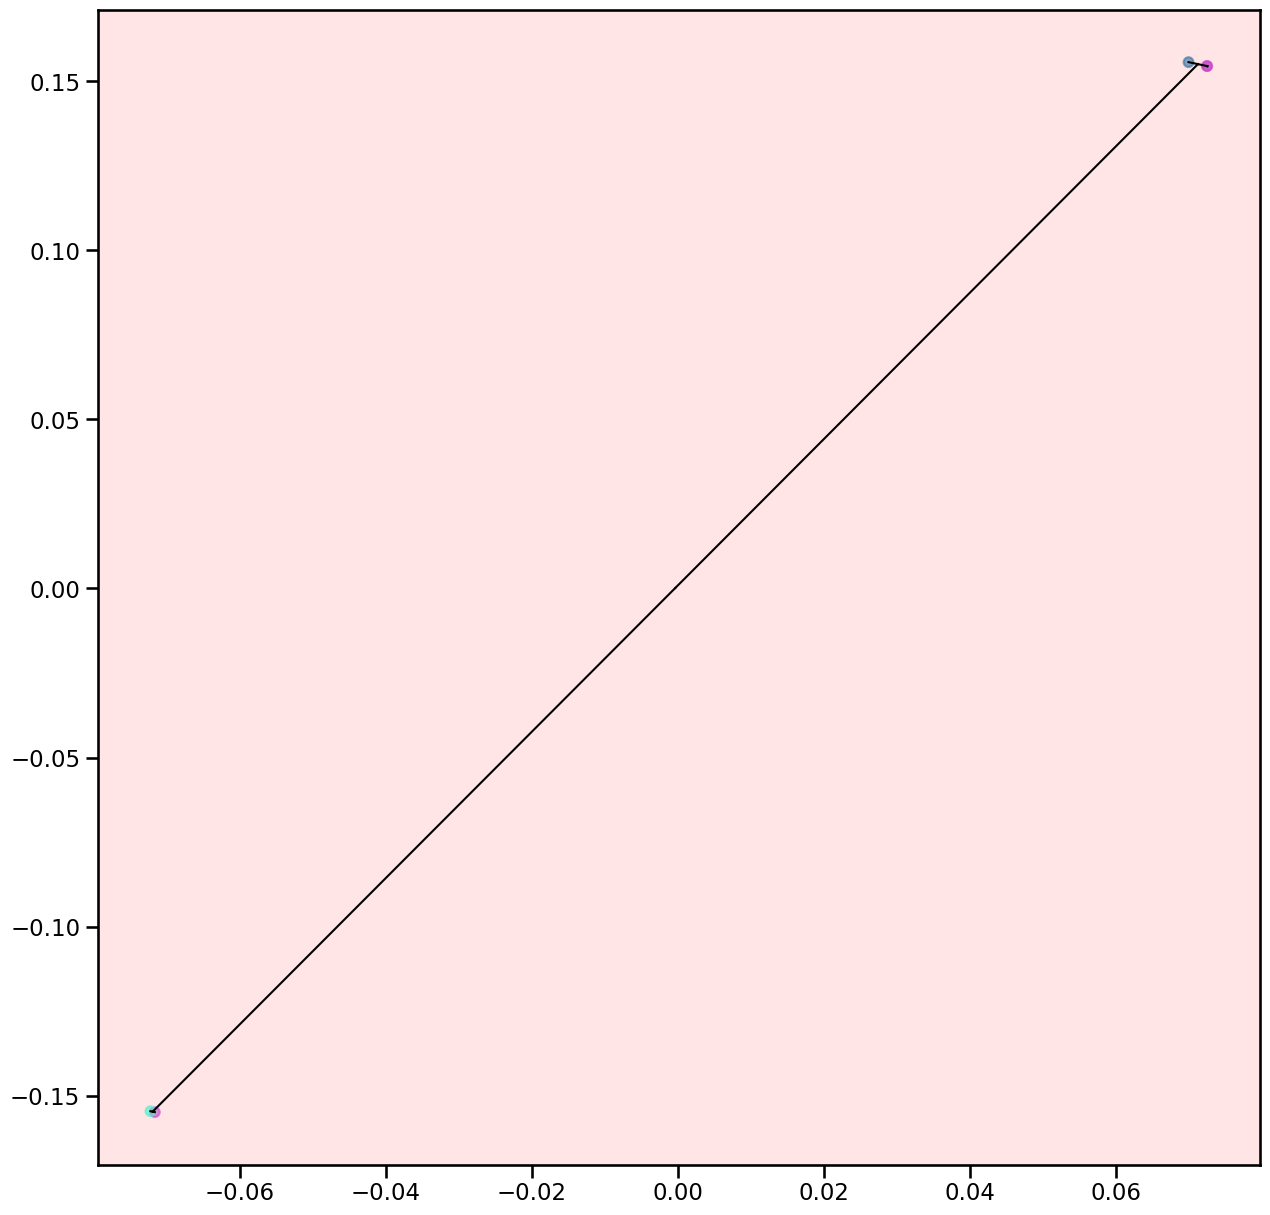

In [94]:
model.eval()

sim_fn = lambda x, y: torch.sum(x * y, dim=-1)
n=len(x);
leaves_embeddings = model.normalize_embeddings(model.embeddings.weight.data)
leaves_embeddings = project(leaves_embeddings).detach().cpu()
ijs = sl_np_mst_ij(leaves_embeddings,sim_fn)
uf = UnionFind(n)
uf.merge(ijs)

tree = nx.DiGraph()
for i, j in enumerate(uf.tree()[:-1]):
    if(j!=-1):
        tree.add_edge(j, i)

n = len(leaves_embeddings)
embeddings = complete_tree(tree, leaves_embeddings)
colors = get_colors(meta_list1, 1234)
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
circle = plt.Circle((0, 0), 1.0, color='r', alpha=0.1)
ax.add_artist(circle)
ax.scatter(embeddings[:n, 0], embeddings[:n, 1], c=colors, s=50, alpha=0.6)
# ax.scatter(embeddings[n:,0],embeddings[n:,1],color ='black',s=20,alpha=0.6)
for n1, n2 in tree.edges():
    x1 = embeddings[n1];
    x2 = embeddings[n2]
    plot_geodesic(x1,x2,ax)

In [95]:

nodes1 = [node(name=str(i),son=[]) for i in range(len(uf.tree()))]
for i in range(n):
    nodes1[i].subson=[i];
for i,j in enumerate(uf.tree()):
    if(j!=-1):
        nodes1[j].son.append(nodes1[i])
    nodes1[i].value=torch.tensor(embeddings[i]);
    nodes1[i].hyper=torch.tensor(embeddings[i])
root = nodes1[-1];
add_meta(root,meta_list1,[])
show_tree(root,color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']).show_fig()
remove_meta(root);

{'CD4Tn': '#184e77', 'Th2': '#1a759f', 'Tfh': '#168aad', 'empty': '#fff'}


In [76]:
temp = rotate(nodes1,embeddings,3,n,similarities)
for i in nodes1:
    i.hyper = temp[int(i)]
    i.value =  temp[int(i)]
embeddings = temp.numpy();
root = nodes1[-1]

6 12
	 Epoch 0 | average train loss1: 0.352574


/Users/dongjiajie/Desktop/alignment/fyp/hyperalignment/final/datasets/balance_dataset.py:54: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

/Users/dongjiajie/Desktop/alignment/fyp/hyperalignment/final/model/balancehc.py:22: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



	 Epoch 0 | average train loss2: 0.336565
	 Epoch 1 | average train loss1: 0.333526


/Users/dongjiajie/Desktop/alignment/fyp/hyperalignment/final/model/balancehc.py:46: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

/Users/dongjiajie/Desktop/alignment/fyp/hyperalignment/final/model/balancehc.py:71: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

/Users/dongjiajie/Desktop/alignment/fyp/hyperalignment/final/model/balancehc.py:92: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



	 Epoch 1 | average train loss2: 0.322120
	 Epoch 2 | average train loss1: 0.326195
	 Epoch 2 | average train loss2: 0.319139


In [77]:
temp,root = merge_points(similarities,root,nodes1,embeddings,3,2,2,n)
for i in nodes1:
    i.hyper = temp[int(i)]
    i.value =  temp[int(i)]
embeddings = temp.numpy();
add_meta(root,meta_list1,[])
show_tree(root,color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']).show_fig()
remove_meta(root);

6 4
5 1
[8, 4, 3, 7, 0, 1, 2]
6 6
	 Epoch 0 | average train loss1: 0.309751
	 Epoch 0 | average train loss2: 0.304479
	 Epoch 1 | average train loss1: 0.306873
	 Epoch 1 | average train loss2: 0.310898
	 Epoch 2 | average train loss1: 0.306574
	 Epoch 2 | average train loss2: 0.313725
{'CD4Tn': '#184e77', 'Th2': '#1a759f', 'Tfh': '#168aad', 'empty': '#fff'}


In [78]:
names = [];
fathers = [];
xys = [];
search_merge_tree(root,-1,0,names,fathers,xys)
np.save('./datas/i/1/'+"dataname_merge.npy",names)
np.save('./datas/i/1/'+"datalink_merge.npy",fathers)
np.save('./datas/i/1/'+"dataxy_merge.npy",[i.numpy() for i in xys]) 

In [98]:
data_path = './datas/i/2/' + 'datas.data'
np.random.seed(1234)
torch.manual_seed(1234)
x, y_true, similarities = load_data(data_path,1,tmp2.shape[1]+1,0)
print("{} length:{}".format(data_path,len(y_true)));
dataset = HCDataset(x, y_true, similarities, num_samples=50000)
dataloader = data.DataLoader(dataset, batch_size=32, shuffle=True, pin_memory=True)
model = HypHC(dataset.n_nodes, 2, 5e-2, 5e-2 ,0.999)

# model.to("cpu")
Optimizer = getattr(optim, 'RAdam')
optimizer = Optimizer(model.parameters(),0.0005)


./datas/i/2/datas.data length:5
Generating all pairs superset


In [99]:
train(model,dataloader,optimizer,similarities,30);


	 Epoch 0 | average train loss: 0.858212
Optimization finished.
	 Epoch 1 | average train loss: 0.856962
Optimization finished.
	 Epoch 2 | average train loss: 0.854180
Optimization finished.
	 Epoch 3 | average train loss: 0.848414
Optimization finished.
	 Epoch 4 | average train loss: 0.849680
Optimization finished.
	 Epoch 5 | average train loss: 0.854683
Optimization finished.
	 Epoch 6 | average train loss: 0.845764
Optimization finished.
	 Epoch 7 | average train loss: 0.853722
Optimization finished.
	 Epoch 8 | average train loss: 0.855092
Optimization finished.
	 Epoch 9 | average train loss: 0.854017
Optimization finished.
	 Epoch 10 | average train loss: 0.856049
Optimization finished.
	 Epoch 11 | average train loss: 0.854591
Optimization finished.
	 Epoch 12 | average train loss: 0.852556
Optimization finished.
	 Epoch 13 | average train loss: 0.848206
Optimization finished.
	 Epoch 14 | average train loss: 0.852712
Optimization finished.
	 Epoch 15 | average train loss: 0.

In [100]:
torch.save(model.state_dict(),'./datas/i/2/' +'model3.pth');


In [101]:
params = torch.load(('./datas/i/2/'+'model3.pth'), map_location=torch.device('cpu'))
model.load_state_dict(params)

<All keys matched successfully>

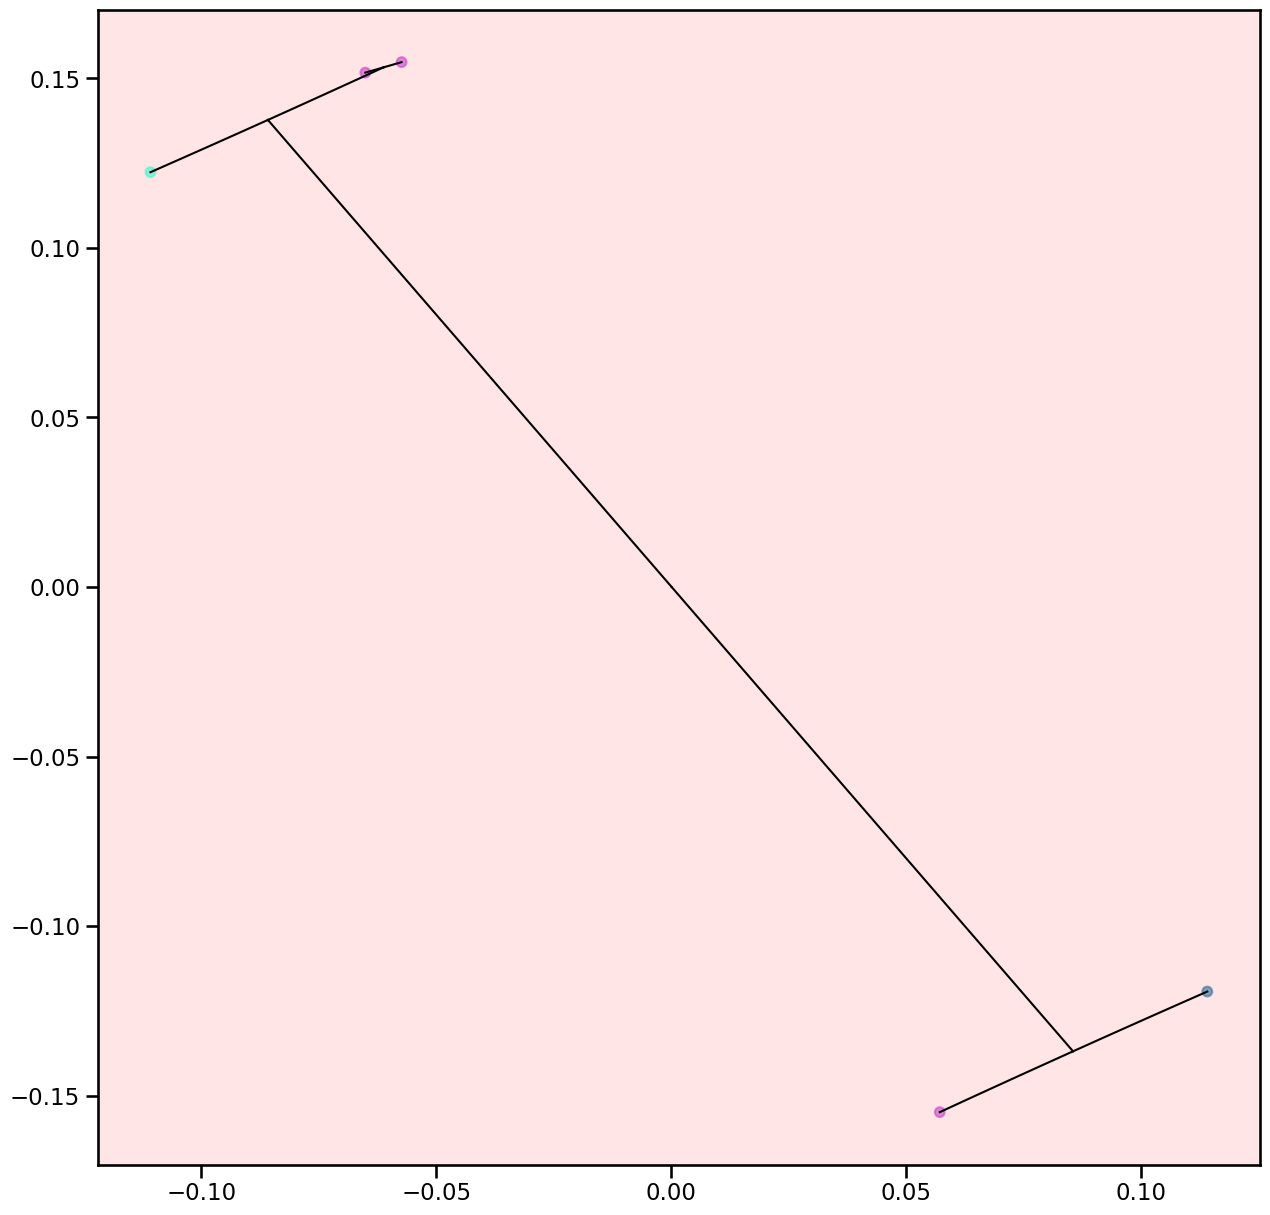

In [102]:
model.eval()

sim_fn = lambda x, y: torch.sum(x * y, dim=-1)
n=len(x);
leaves_embeddings = model.normalize_embeddings(model.embeddings.weight.data)
leaves_embeddings = project(leaves_embeddings).detach().cpu()
ijs = sl_np_mst_ij(leaves_embeddings,sim_fn)
uf = UnionFind(n)
uf.merge(ijs)

tree = nx.DiGraph()
for i, j in enumerate(uf.tree()[:-1]):
    if(j!=-1):
        tree.add_edge(j, i)

n = len(leaves_embeddings)
embeddings = complete_tree(tree, leaves_embeddings)
colors = get_colors(meta_list2, 1234)
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
circle = plt.Circle((0, 0), 1.0, color='r', alpha=0.1)
ax.add_artist(circle)
ax.scatter(embeddings[:n, 0], embeddings[:n, 1], c=colors, s=50, alpha=0.6)
# ax.scatter(embeddings[n:,0],embeddings[n:,1],color ='black',s=20,alpha=0.6)
for n1, n2 in tree.edges():
    x1 = embeddings[n1];
    x2 = embeddings[n2]
    plot_geodesic(x1,x2,ax)

In [103]:

nodes1 = [node(name=str(i),son=[]) for i in range(len(uf.tree()))]
for i in range(n):
    nodes1[i].subson=[i];
for i,j in enumerate(uf.tree()):
    if(j!=-1):
        nodes1[j].son.append(nodes1[i])
    nodes1[i].value=torch.tensor(embeddings[i]);
    nodes1[i].hyper=torch.tensor(embeddings[i])
root = nodes1[-1];
add_meta(root,meta_list2,[])
show_tree(root,color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']).show_fig()
remove_meta(root);

{'CD4Tn': '#184e77', 'Tfh': '#1a759f', 'empty': '#fff', 'Th17': '#34a0a4'}


In [104]:
temp = rotate(nodes1,embeddings,3,n,similarities)
for i in nodes1:
    i.hyper = temp[int(i)]
    i.value =  temp[int(i)]
embeddings = temp.numpy();
root = nodes1[-1]

6 12
	 Epoch 0 | average train loss1: 0.359896
	 Epoch 0 | average train loss2: 0.355468


/Users/dongjiajie/Desktop/alignment/fyp/hyperalignment/final/datasets/balance_dataset.py:54: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

/Users/dongjiajie/Desktop/alignment/fyp/hyperalignment/final/model/balancehc.py:22: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

/Users/dongjiajie/Desktop/alignment/fyp/hyperalignment/final/model/balancehc.py:46: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



	 Epoch 1 | average train loss1: 0.359621
	 Epoch 1 | average train loss2: 0.355174
	 Epoch 2 | average train loss1: 0.358431


/Users/dongjiajie/Desktop/alignment/fyp/hyperalignment/final/model/balancehc.py:71: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

/Users/dongjiajie/Desktop/alignment/fyp/hyperalignment/final/model/balancehc.py:92: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



	 Epoch 2 | average train loss2: 0.354735


In [110]:
hyp_dist(nodes1[0].hyper,nodes1[4].hyper)

tensor([0.6192], dtype=torch.float64)

In [108]:
temp,root = merge_points(similarities,root,nodes1,embeddings,3,2,0.6,n)
for i in nodes1:
    i.hyper = temp[int(i)]
    i.value =  temp[int(i)]
embeddings = temp.numpy();
add_meta(root,meta_list2,[])
show_tree(root,color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']).show_fig()
remove_meta(root);

5 2
[8, 6, 1, 2, 3, 7, 0, 4]
9 9
	 Epoch 0 | average train loss1: 0.348891
	 Epoch 0 | average train loss2: 0.348520
	 Epoch 1 | average train loss1: 0.348814


/Users/dongjiajie/Desktop/alignment/fyp/hyperalignment/final/model/balancehc.py:22: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

/Users/dongjiajie/Desktop/alignment/fyp/hyperalignment/final/datasets/balance_dataset.py:54: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

/Users/dongjiajie/Desktop/alignment/fyp/hyperalignment/final/model/balancehc.py:46: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

/Users/dongjiajie/Desktop/alignment/fyp/hyperalignment/final/model/balanceh

	 Epoch 1 | average train loss2: 0.348011
	 Epoch 2 | average train loss1: 0.349192
	 Epoch 2 | average train loss2: 0.348123
{'CD4Tn': '#184e77', 'Tfh': '#1a759f', 'empty': '#fff', 'Th17': '#34a0a4'}


In [111]:
temp,root = merge_points(similarities,root,nodes1,embeddings,3,2,0.6,n)
for i in nodes1:
    i.hyper = temp[int(i)]
    i.value =  temp[int(i)]
embeddings = temp.numpy();
add_meta(root,meta_list2,[])
show_tree(root,color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']).show_fig()
remove_meta(root);

6 1
[8, 1, 2, 3, 7, 0, 4]
3 3
	 Epoch 0 | average train loss1: 0.347208
	 Epoch 0 | average train loss2: 0.345943
	 Epoch 1 | average train loss1: 0.346126
	 Epoch 1 | average train loss2: 0.345903
	 Epoch 2 | average train loss1: 0.346114
	 Epoch 2 | average train loss2: 0.345732
{'CD4Tn': '#184e77', 'Tfh': '#1a759f', 'empty': '#fff', 'Th17': '#34a0a4'}


In [112]:
names = [];
fathers = [];
xys = [];
search_merge_tree(root,-1,0,names,fathers,xys)
np.save('./datas/i/2/'+"dataname_merge.npy",names)
np.save('./datas/i/2/'+"datalink_merge.npy",fathers)
np.save('./datas/i/2/'+"dataxy_merge.npy",[i.numpy() for i in xys]) 

In [113]:
nodes1 = build_hyper_tree_from_folder('./datas/i/1/',True)
nodes2 = build_hyper_tree_from_folder('./datas/i/2/',True)
nodes_merge1 = [];
nodes_merge2 = [];
add_meta(nodes1[0],meta_list1,[])
add_meta(nodes2[0],meta_list2,[])

        

rate,anslist,ans = run_alignment(nodes1,nodes2,'./datas/i/1/','./datas/i/2/',meta_list1,meta_list2);


/Users/dongjiajie/Desktop/alignment/fyp/hyperalignment/final/alignment.py:799: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/Users/dongjiajie/Desktop/alignment/fyp/hyperalignment/final/alignment.py:799: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for a

The mininum cost for alignment is 3.272727272727273
The alignment edges list is [('8', '8'), ('7', '1_Th17'), ('1_Tfh', '2_Tfh'), ('2_Tfh', '3_Tfh'), ('4_Th2', '7'), ('3_Tfh', '4_Tfh')]
average cost for one node:0.2337662337662338

correct alignment rate:1.0


In [114]:
ans

[('8', '8'),
 ('7', '1_Th17'),
 ('1_Tfh', '2_Tfh'),
 ('2_Tfh', '3_Tfh'),
 ('4_Th2', '7'),
 ('3_Tfh', '4_Tfh')]

In [115]:
nodes1 = build_hyper_tree_from_folder('./datas/i/1/',True)
nodes2 = build_hyper_tree_from_folder('./datas/i/2/',True)
nodes_merge1 = [];
nodes_merge2 = [];
add_meta(nodes1[0],meta_list1,[])
add_meta(nodes2[0],meta_list2,[])
T=tree_alignment(nodes1[0],nodes2[0],1);
minn = T.run_alignment();
T.show_ans();
ans = T.get_ans()
t=show_graph(ans,nodes1[0],nodes2[0]);
t.show_fig()

/Users/dongjiajie/Desktop/alignment/fyp/hyperalignment/final/alignment.py:799: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/Users/dongjiajie/Desktop/alignment/fyp/hyperalignment/final/alignment.py:799: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for a

The mininum cost for alignment is 3.272727272727273
The alignment edges list is [('8', '8'), ('7', '1_Th17'), ('1_Tfh', '2_Tfh'), ('2_Tfh', '3_Tfh'), ('4_Th2', '7'), ('3_Tfh', '4_Tfh')]


In [205]:
cosine_similarity(np.array(a2).reshape(1,-1),np.array(g).reshape(1,-1)),cosine_similarity(np.array(a1).reshape(1,-1),np.array(g).reshape(1,-1))


(array([[0.9386075]], dtype=float32), array([[0.94100225]], dtype=float32))

In [213]:
cosine_similarity(np.array(adata[adata.obs[adata.obs['leiden']=='5'].index].to_df().mean()).reshape(1,-1),np.array(g).reshape(1,-1))

array([[0.91939384]], dtype=float32)

In [227]:
meta_list

['CD4Tn', 'Th17', 'Tfh', 'Tfh', 'Tfh', 'Th2']

In [198]:
a1 = adata[adata.obs[adata.obs['leiden']=='0'].index].to_df().mean()
a2 = adata[adata.obs[adata.obs['leiden']=='2'].index].to_df().mean()

a=hyp_dist(nodes1[3].hyper,nodes1[4].hyper).numpy()
b= hyp_dist(nodes1[3].hyper,nodes1[5].hyper).numpy()
r = a1*a/(a+b) + a2*b/(a+b)
g = adata[adata.obs[adata.obs['leiden']=='1'].index].to_df().mean()
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(np.array(r).reshape(1,-1),np.array(g).reshape(1,-1))

array([[0.9581606966]])

In [214]:
a1 = adata[adata.obs[adata.obs['leiden']=='0'].index].to_df().mean()
a2 = adata[adata.obs[adata.obs['leiden']=='4'].index].to_df().mean()

a=hyp_dist(nodes2[4].hyper,nodes2[5].hyper).numpy()
b= hyp_dist(nodes2[4].hyper,nodes2[6].hyper).numpy()
r = a1*a/(a+b) + a2*b/(a+b)
g = adata[adata.obs[adata.obs['leiden']=='5'].index].to_df().mean()
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(np.array(r).reshape(1,-1),np.array(g).reshape(1,-1))

array([[0.9565370398]])

In [226]:
(cosine_similarity(np.array(adata[adata.obs[adata.obs['leiden']=='0'].index].to_df().mean()).reshape(1,-1),np.array(g).reshape(1,-1)) + cosine_similarity(np.array(adata[adata.obs[adata.obs['leiden']=='4'].index].to_df().mean()).reshape(1,-1),np.array(g).reshape(1,-1)) )/2

array([[0.9293215]], dtype=float32)

In [147]:
meta_list

['CD4Tn', 'Th17', 'Tfh', 'Tfh', 'Tfh', 'Th2']

In [127]:
nodes1[2].value,nodes2[6].value

(array([ 4.3086166382, -1.2421941757,  0.5259457231, -0.1321692616,
         0.9548937678, -0.253051877 ,  0.3161777258, -0.0184609685,
        -0.251460135 , -0.0681598634]),
 array([ 4.3086166382, -1.2421941757,  0.5259457231, -0.1321692616,
         0.9548937678, -0.253051877 ,  0.3161777258, -0.0184609685,
        -0.251460135 , -0.0681598634]))

In [124]:
nodes1[1].value 

array([ 4.3086166382, -1.2421941757,  0.5259457231, -0.1321692616,
        0.9548937678, -0.253051877 ,  0.3161777258, -0.0184609685,
       -0.251460135 , -0.0681598634])

In [146]:
import math

mea = 0
for i,j in zip(nodes1[1].value,nodes2[4].value):
    mea = mea + (i-j)**2
    
mea/math.sqrt(len(nodes1[1].value))
    

4.917666769074776

In [140]:
nodes2[4].value

array([ 0.4512535686, -0.9134253176, -0.1381763059, -0.1828279486,
        0.8920344544, -0.2665275903,  0.1206566489,  0.1397370986,
       -0.0424682715, -0.1630227761])

In [137]:
nodes2[5].value,nodes2[6].value

(array([-3.4789896011, -0.5784447789, -0.8148460984, -0.2344437689,
         0.8279874921, -0.2802579105, -0.0785585567,  0.3009241223,
         0.1704722345, -0.2596780062]),
 array([ 4.3086166382, -1.2421941757,  0.5259457231, -0.1321692616,
         0.9548937678, -0.253051877 ,  0.3161777258, -0.0184609685,
        -0.251460135 , -0.0681598634]))

In [91]:
meta_list2

['CD4Tn', 'Th17', 'Tfh', 'Tfh', 'Tfh']

In [92]:
len(nodes1),len(nodes2)

(7, 7)

In [236]:
a=3
b=7
c=0
3*a*a+2*b*b+c*c

125

In [237]:
meta_list1 = ['CD4Tn', 'Tfh', 'Tfh', 'Tfh', 'Th2']


['CD4Tn', 'Tfh', 'Tfh', 'Tfh', 'Th2']

In [238]:
meta_list2 = ['CD4Tn', 'Th17', 'Tfh', 'Tfh', 'Tfh']

['CD4Tn', 'Th17', 'Tfh', 'Tfh', 'Tfh']